# Naive Bayes Models

In this lab you will work with **naive Bayes models**. Naive Bayes models are a surprisingly useful and effective simplification of the general Bayesian models. Naive Bayes models make the naive assumption of statistical independence of the features. In many cases, naive Bayes module are surprisingly effective despite violating the assumption of independence. 

In simple terms, naive Bayes models use empirical distributions of the features to compute probabilities of the labels. The naive Bayes models can use most any family of distributions for the features. It is important to select the correct distribution family for the data you are working with. Common cases are:
- **Gaussian;** for continuous or numerical features.
- **Bernoulli;** for features with binary values. 
- **Multinomial;** for features with more than two categories. 

These is one pit fall, the model fails if a zero probability is encountered. This situation occurs when there is a 'hole' in the sample space where there are no samples. A simple smoothing procedure can deal with this problem. The smoothing hyperparameter, usually called alpha, is one of the few required for naive Bayes models. 

Some properties of naive Bayes models are:
- Computational complexity is linear in number of parameter/features, making naive Bayes models highly scalable. There are out or core approaches suitable for massive datasets.
- Requires minimal data to produce models that generalizes well. If there are only a few cases per category to train a model a naive Bayes model can be a good choice. 
- Have a simple and inherent regularization.

Naive Bayes models are used in many situations including:

- Document classification
- SPAM detection
- Image classification 



As a first step, execute the code in the cell below to load the required packages to run the rest of this notebook. 

In [1]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB, BernoulliNB
#from statsmodels.api import datasets
from sklearn import datasets ## Get dataset from sklearn
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr

%matplotlib inline

To get a feel for these data, you will now load and plot them. The code in the cell below does the following:

1. Loads the iris data as a Pandas data frame. 
2. Adds column names to the data frame.
3. Displays all 4 possible scatter plot views of the data. 

Execute this code and examine the results. 

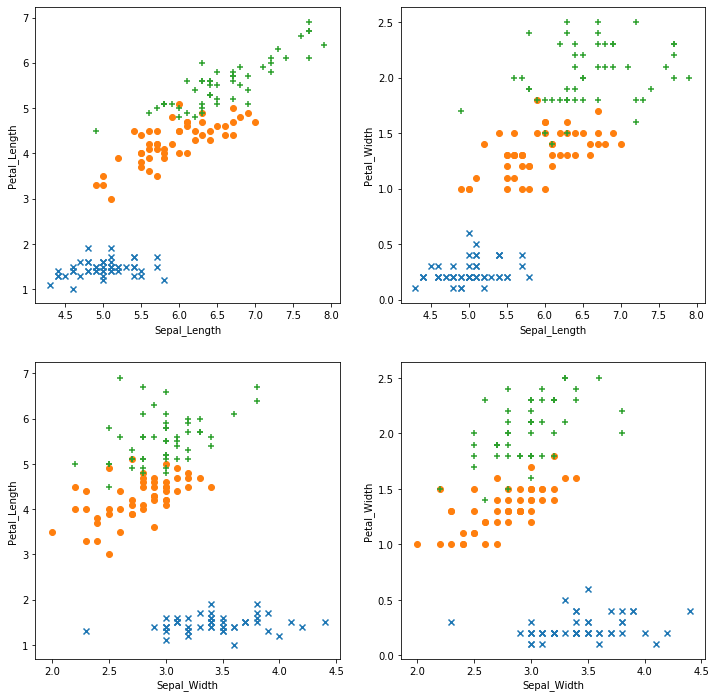

In [2]:
def plot_iris(iris):
    '''Function to plot iris data by type'''
    setosa = iris[iris['Species'] == 'setosa']
    versicolor = iris[iris['Species'] == 'versicolor']
    virginica = iris[iris['Species'] == 'virginica']
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    x_ax = ['Sepal_Length', 'Sepal_Width']
    y_ax = ['Petal_Length', 'Petal_Width']
    for i in range(2):
        for j in range(2):
            ax[i,j].scatter(setosa[x_ax[i]], setosa[y_ax[j]], marker = 'x')
            ax[i,j].scatter(versicolor[x_ax[i]], versicolor[y_ax[j]], marker = 'o')
            ax[i,j].scatter(virginica[x_ax[i]], virginica[y_ax[j]], marker = '+')
            ax[i,j].set_xlabel(x_ax[i])
            ax[i,j].set_ylabel(y_ax[j])
            
## Import the dataset from sklearn.datasets
iris = datasets.load_iris()

## Create a data frame from the dictionary
species = [iris.target_names[x] for x in iris.target]
iris = pd.DataFrame(iris['data'], columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris['Species'] = species

## Plot views of the iris data            
plot_iris(iris) 

You can see that Setosa (blue) is well separated from the other two categories. The Versicolor (orange) and the Virginica (green) show considerable overlap. The question is how well our classifier will separate these categories. 

Scikit Learn classifiers require numerically coded numpy arrays for the features and as a label. The code in the cell below does the following processing:
1. Creates a numpy array of the features.
2. Numerically codes the label using a dictionary lookup, and converts it to a numpy array. 

Execute this code.

In [3]:
Features = np.array(iris[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']])

levels = {'setosa':0, 'versicolor':1, 'virginica':2}
Labels =  np.array([levels[x] for x in iris['Species']])

Next, execute the code in the cell below to split the dataset into test and training set. Notice that unusually, 100 of the 150 cases are being used as the test dataset. 

In [4]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 100)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

As is always the case with machine learning, numeric features  must be scaled. The code in the cell below performs the following processing:

1. A Zscore scale object is defined using the `StandarScaler` function from the scikit-learn preprocessing package. 
2. The scaler is fit to the training features. Subsequently, this scaler is used to apply the same scaling to the test data and in production. 
3. The training features are scaled using the `transform` method. 

Execute this code.

In [5]:
scale = preprocessing.StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)

Now you will define and fit a Gaussian naive Bayes model. A Gaussian model is appropriate here since all of the features are numeric. 

The code in the cell below defines a Gaussian naive Bayes model object using the `GaussianNB` function from the scikit-learn naive_bayes package, and then fits the model. Execute this code.

In [6]:
NB_mod = GaussianNB()
NB_mod.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Notice that the Gaussian naive Bayes model object has only one hyperparameter. 

Next, the code in the cell below performs the following processing to score the test data subset:
1. The test features are scaled using the scaler computed for the training features. 
2. The `predict` method is used to compute the scores from the scaled features. 

Execute this code. 

In [7]:
X_test = scale.transform(X_test)
scores = NB_mod.predict(X_test)

It is time to evaluate the model results. Keep in mind that the problem has been made deliberately difficult, by having more test cases than training cases. 

The iris data has three species categories. Therefore it is necessary to use evaluation code for a three category problem. The function in the cell below extends code from previous labs to deal with a three category problem. 

Execute this code, examine the results, and answer **Question 1** on the course page.

In [8]:
def print_metrics_3(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score Setosa   Score Versicolor    Score Virginica')
    print('Actual Setosa      %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2])
    print('Actual Versicolor  %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2])
    print('Actual Vriginica   %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('          Setosa  Versicolor  Virginica')
    print('Num case   %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1] + '      %0.2f' % metrics[3][2])
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1] + '       %0.2f' % metrics[0][2])
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1] + '       %0.2f' % metrics[1][2])
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1] + '       %0.2f' % metrics[2][2])
    
print_metrics_3(y_test, scores)   

                 Confusion matrix
                 Score Setosa   Score Versicolor    Score Virginica
Actual Setosa          35                0                 0
Actual Versicolor       0               27                 7
Actual Vriginica        0                2                29

Accuracy        0.91
 
          Setosa  Versicolor  Virginica
Num case   35.00     34.00      31.00
Precision   1.00      0.93       0.81
Recall      1.00      0.79       0.94
F1          1.00      0.86       0.87


Examine these results. Notice the following:
1. The confusion matrix has dimension 3X3. You can see that most cases are correctly classified. 
2. The overall accuracy is 0.91. Since the classes are roughly balanced, this metric indicates relatively good performance of the classifier, particularly since it was only trained on 50 cases. As was mentioned previously, naive Bayes models require only small amounts of training data. 
3. The precision, recall and  F1 for each of the classes is relatively good. Versicolor has the worst metrics since it has the largest number of misclassified cases. 

To get a better feel for what the classifier is doing, the code in the cell below displays a set of plots showing correctly (as '+') and incorrectly (as 'o') cases, with the species color-coded. Execute this code and examine the results. 

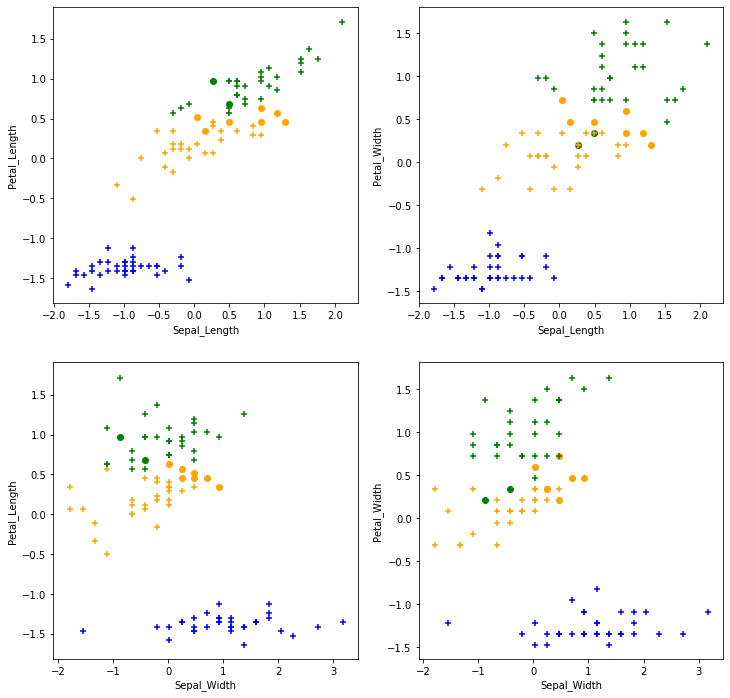

In [9]:
def plot_iris_score(iris, y_test, scores):
    '''Function to plot iris data by type'''
    ## Find correctly and incorrectly classified cases
    true = np.equal(scores, y_test).astype(int)
    
    ## Create data frame from the test data
    iris = pd.DataFrame(iris)
    levels = {0:'setosa', 1:'versicolor', 2:'virginica'}
    iris['Species'] = [levels[x] for x in y_test]
    iris.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']
    
    ## Set up for the plot
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    markers = ['o', '+']
    x_ax = ['Sepal_Length', 'Sepal_Width']
    y_ax = ['Petal_Length', 'Petal_Width']
    
    for t in range(2): # loop over correct and incorect classifications
        setosa = iris[(iris['Species'] == 'setosa') & (true == t)]
        versicolor = iris[(iris['Species'] == 'versicolor') & (true == t)]
        virginica = iris[(iris['Species'] == 'virginica') & (true == t)]
        # loop over all the dimensions
        for i in range(2):
            for j in range(2):
                ax[i,j].scatter(setosa[x_ax[i]], setosa[y_ax[j]], marker = markers[t], color = 'blue')
                ax[i,j].scatter(versicolor[x_ax[i]], versicolor[y_ax[j]], marker = markers[t], color = 'orange')
                ax[i,j].scatter(virginica[x_ax[i]], virginica[y_ax[j]], marker = markers[t], color = 'green')
                ax[i,j].set_xlabel(x_ax[i])
                ax[i,j].set_ylabel(y_ax[j])

plot_iris_score(X_test, y_test, scores)

Examine these plots. You can see how the classifier has divided the feature space between the classes. Notice that most of the errors occur in the overlap region between Virginica and Versicolor. This behavior is to be expected. 

## Summary

In this lab you have accomplished the following:
1. Used a Gaussian naive model to classify the cases of the iris data. The overall model performance was reasonable. 